## Simulation of correlation results as changes in mean firing rate

In [3]:
import numpy as np
import scipy
import TreeMazeAnalyses2.Utils.robust_stats as rs
import TreeMazeAnalyses2.Analyses.tree_maze_functions as tmf

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
n_bins = 39

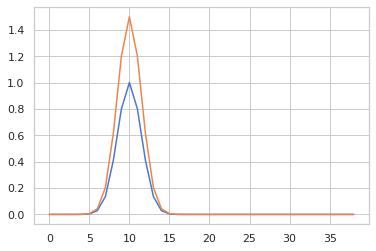

In [110]:
def normal(x, A, mu, sigma):
    s2 = 2*sigma**2
    #c = 1/np.sqrt(np.pi*s2)
    return A*np.exp(-(x-mu)**2/s2)

def add_activity_field(x_map, A, mu, sigma):
    x_map += normal(np.arange(len(x_map)), A, mu, sigma)
    #x_map = A*x_map/x_map.max()
    return x_map

def add_uniform_noise(x_map, noise_amp):
    x_map2 = x_map+np.random.uniform(0,noise_amp,len(x_map))
    return x_map2
    
x = np.zeros(n_bins)
A = 1
mu=10
sigma=1.5
plt.plot(add_activity_field(x, A, mu,sigma))
plt.plot(add_activity_field(x, A*0.5, mu,sigma))

In [126]:
add_uniform_noise(x,0.2)

array([1.51032169e-01, 1.03272196e-01, 1.13201850e-01, 5.07036893e-02,
       8.29278136e-02, 1.25236591e-02, 2.27074967e-01, 2.53949470e-01,
       6.31927387e-01, 1.36318669e+00, 1.59999876e+00, 1.33928110e+00,
       7.12324522e-01, 3.99725532e-01, 1.94980813e-01, 2.40372854e-02,
       1.83337085e-01, 4.74084281e-02, 1.35197137e-01, 1.55018569e-01,
       1.87615000e-01, 1.38660803e-01, 1.59568703e-01, 1.99542316e-01,
       1.17892043e-01, 1.24107850e-01, 1.74656909e-01, 9.67685259e-02,
       1.72173149e-01, 8.15689211e-02, 1.43205086e-01, 7.33386812e-02,
       1.54097504e-01, 3.81211735e-02, 5.18659080e-03, 1.12649840e-01,
       6.42481046e-02, 2.09890286e-04, 7.67347601e-02])

## simulation of changes in one field amplitude

Text(0, 0.5, 'Correlation')

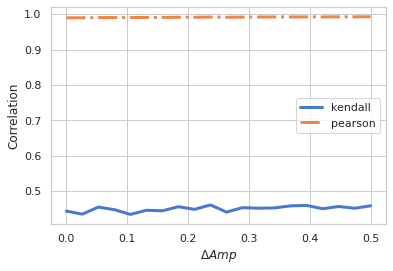

In [158]:
n_bins = 39
n_amps = 20
n_sims = 100

max_change = 0.5

sigma = 2
mu = 10
A = 1

noise_max_amp = 0.1

amp_deltas = np.linspace(0,max_change,n_amps)
taus = np.zeros((n_amps, n_sims))
corrs = np.zeros((n_amps, n_sims))

for ii in range(n_amps):
    x = np.zeros(n_bins)
    x = add_activity_field(x, A, mu, sigma)
    
    y = np.zeros(n_bins)
    y = add_activity_field(y, A+amp_deltas[ii], mu, sigma)

    for jj in range(n_sims):
        x2 = add_uniform_noise(x, noise_max_amp)
        y2 = add_uniform_noise(y, noise_max_amp)
        taus[ii,jj] = rs.kendall(x2,y2)
        corrs[ii,jj] = rs.pearson(x2,y2)
    
f,ax = plt.subplots()

ax.plot(amp_deltas, taus.mean(axis=1), lw=3,label = 'kendall')
ax.plot(amp_deltas, corrs.mean(axis=1), lw=3, ls='-.',label='pearson')
ax.legend()
ax.set_xlabel(r"$\Delta Amp$")
ax.set_ylabel("Correlation")


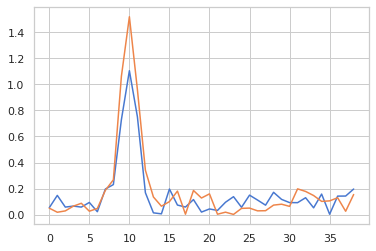

In [131]:
plt.plot(x2)
plt.plot(y2)

## moving a field in the x position

Text(0, 0.5, 'Correlation')

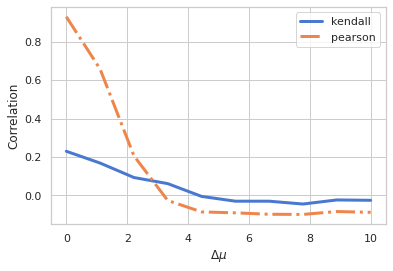

In [144]:
n_bins = 39
n_sims = 100

max_change = 10
n_xlocs = 10

sigma = 1
mu = 10
A = 1

noise_max_amp = 0.2

amp_deltas = np.linspace(0,max_change,n_xlocs)
taus = np.zeros((n_xlocs, n_sims))
corrs = np.zeros((n_xlocs, n_sims))

for ii in range(n_xlocs):
    x = np.zeros(n_bins)
    x = add_activity_field(x, A, mu, sigma)
    
    y = np.zeros(n_bins)
    y = add_activity_field(y, A, mu+amp_deltas[ii], sigma)

    for jj in range(n_sims):
        x2 = add_uniform_noise(x, noise_max_amp)
        y2 = add_uniform_noise(y, noise_max_amp)
        taus[ii,jj] = rs.kendall(x2,y2)
        corrs[ii,jj] = rs.pearson(x2,y2)
    
f,ax = plt.subplots()

ax.plot(amp_deltas, taus.mean(axis=1), lw=3,label = 'kendall')
ax.plot(amp_deltas, corrs.mean(axis=1), lw=3, ls='-.',label='pearson')
ax.legend()
ax.set_xlabel(r"$\Delta \mu$")
ax.set_ylabel("Correlation")

## changes in field width

Text(0, 0.5, 'Correlation')

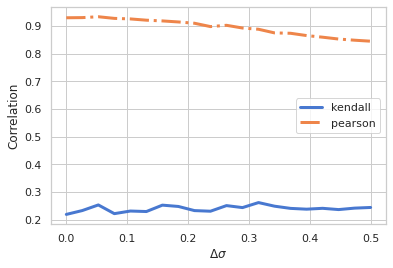

In [136]:
n_bins = 39
n_amps = 20
n_sims = 100
max_change = 1

sigma = 1
mu = 10
A = 1

sigma_deltas = np.linspace(0,max_change, n_amps)
taus = np.zeros((n_amps, n_sims))
corrs = np.zeros((n_amps, n_sims))
for ii in range(n_amps):
    x = np.zeros(n_bins)
    x = add_activity_field(x, A, mu, sigma)
    y = np.zeros(n_bins)
    y = add_activity_field(y, A, mu, sigma+sigma_deltas[ii])
    
    for jj in range(n_sims):
        x2 = add_uniform_noise(x, noise_max_amp)
        y2 = add_uniform_noise(y, noise_max_amp)
        taus[ii,jj] = rs.kendall(x2,y2)
        corrs[ii,jj] = rs.pearson(x2,y2)
    
f,ax = plt.subplots()

ax.plot(amp_deltas, taus.mean(axis=1), lw=3,label = 'kendall')
ax.plot(amp_deltas, corrs.mean(axis=1), lw=3, ls='-.',label='pearson')

ax.legend()
ax.set_xlabel(r"$\Delta \sigma$")
ax.set_ylabel("Correlation")


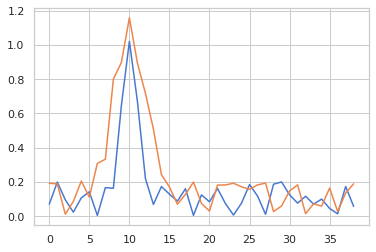

In [138]:
plt.plot(x2)
plt.plot(y2)

## different noise levels

Text(0, 0.5, 'Correlation')

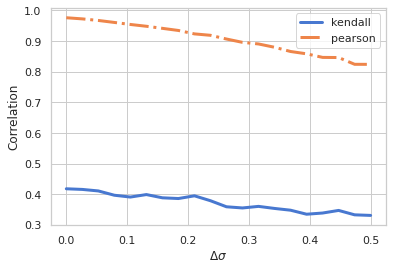

In [151]:
n_bins = 39
n_amps = 20
n_sims = 100
max_change = 0.5

sigma = 2
mu = 10
A = 1

noise_max_amp = 0.15
noise_deltas = np.linspace(0,max_change, n_amps)

taus = np.zeros((n_amps, n_sims))
corrs = np.zeros((n_amps, n_sims))

for ii in range(n_amps):
    x = np.zeros(n_bins)
    x = add_activity_field(x, A, mu, sigma)
    y = np.zeros(n_bins)
    y = add_activity_field(y, A, mu, sigma)
    
    for jj in range(n_sims):
        x2 = add_uniform_noise(x, noise_max_amp)
        y2 = add_uniform_noise(y, noise_max_amp+noise_deltas[ii])
        taus[ii,jj] = rs.kendall(x2,y2)
        corrs[ii,jj] = rs.pearson(x2,y2)
    
f,ax = plt.subplots()

ax.plot(noise_deltas, taus.mean(axis=1), lw=3,label = 'kendall')
ax.plot(noise_deltas, corrs.mean(axis=1), lw=3, ls='-.',label='pearson')

ax.legend()
ax.set_xlabel(r"$\Delta \sigma$")
ax.set_ylabel("Correlation")


## two fields: one changing in amplitude

Text(0, 0.5, 'Correlation')

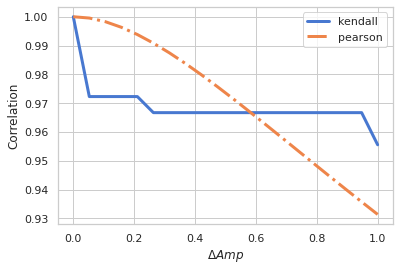

In [156]:
n_bins = 39
n_amps = 20
n_sims = 100
max_change = 1

sigma = 1.5
mu1 = 10
mu2 = 30 

A = 1
noise_max_amp = 0

amp_deltas = np.linspace(0,max_change,n_amps)
taus = np.zeros((n_amps, n_sims))
corrs = np.zeros((n_amps, n_sims))
for ii in range(n_amps):
    x = np.zeros(n_bins)
    x = add_activity_field(x, A, mu1, sigma)
    x = add_activity_field(x, A, mu2, sigma)
    
    y = np.zeros(n_bins)
    y = add_activity_field(y, A, mu1, sigma)
    y = add_activity_field(y, A+amp_deltas[ii], mu2, sigma)

    for jj in range(n_sims):
        x2 = add_uniform_noise(x, noise_max_amp)
        y2 = add_uniform_noise(y, noise_max_amp)
        taus[ii,jj] = rs.kendall(x2,y2)
        corrs[ii,jj] = rs.pearson(x2,y2)
    
    
f,ax = plt.subplots()

ax.plot(amp_deltas, taus.mean(axis=1), lw=3,label = 'kendall')
ax.plot(amp_deltas, corrs.mean(axis=1), lw=3, ls='-.',label='pearson')
ax.legend()
ax.set_xlabel(r"$\Delta Amp$")
ax.set_ylabel("Correlation")


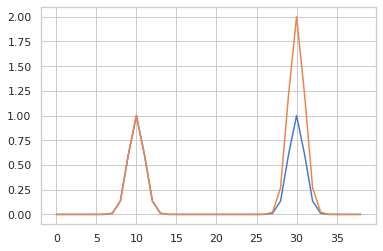

In [141]:
plt.plot(x)
plt.plot(y)

In [4]:
tmz = tmf.TreeMazeZones()

<AxesSubplot:>

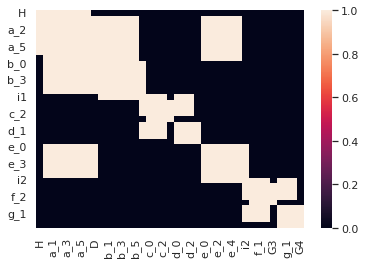

In [6]:
sns.heatmap(tmz.valid_transition_mat)

In [ ]:
scipy.

In [160]:
from importlib import reload 
tmf = reload(tmf)

In [161]:
tmf.add_numbers(5,4,3)

TypeError: 'int' object is not iterable

In [162]:
def summer(*args):
    return sum(args)

In [163]:
summer(4,5,6,7)

22